> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating a TMDd-5000-Movie-Dataset**
### Ikwuonwu Jonathan Ukaegbu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>


## **Introduction** <a class="anchor" id="introduction"></a>
> In this project, we analyzed a dataset and then communicated the findings about it. We used the Python libraries NumPy, pandas, and Matplotlib to make your analysis easier.

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> I will explore the following questions:
1. What is the rubtime of the movies?
2. what is the relationship between movie budget and revenue?
3. What is the most profitable movie?
4. what are the number of movie release each year

In [1]:
# import statements for all of the packages 
import pandas as pd  
import numpy as np  
import csv 
import seaborn as sns
import matplotlib.pyplot as plt

# 'magic word' so that your visualizations are plotted
%matplotlib inline


In [2]:
# Displaying the top 10 rows of the dataset
# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('tmdb-movies.csv', sep=',')

#printing first ten rows with defined columns of tmdb-movies database
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

## Displaying the dimensions of the dataset

In [3]:
df.shape

(10866, 21)

**Observation:** I have a dataset that contains movie information that includes, budget, revenue, runtime and name of a different genres of movies. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. therefore i will be dropping these columsn later as I do not need them all for my analysis.

**summary of the dataset that includes index and column dtypes, non-null values and memory usage**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

**Descriptive Summary Statistics on Raw Data.**

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation**
* From this summary we observe that there are minimum values are zero values for runtime, budget, revenue, budget_adj and revenue_adj

**Taking a look at the heatmap**

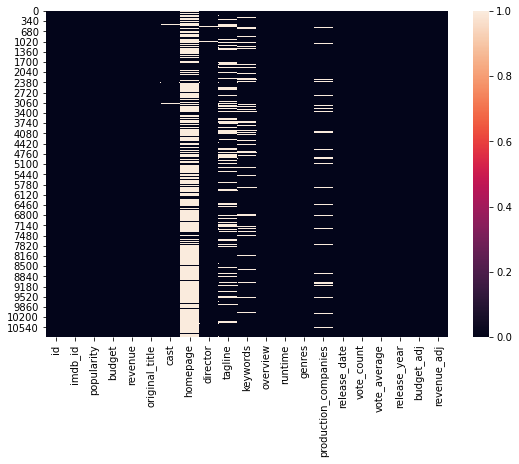

imdb_id's null rate :0.09%
cast's null rate :0.7%
homepage's null rate :72.98%
director's null rate :0.4%
tagline's null rate :25.99%
keywords's null rate :13.74%
overview's null rate :0.04%
genres's null rate :0.21%
production_companies's null rate :9.48%


In [7]:
plt.figure(figsize=(9,6))

sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

### **Data Cleaning**
**the steps followed for cleaning this data will include**
1. Drop Columns
2. Drop the duplicate values
3. Keeping zero values and replacing with NaN values
4. Filling the zero value with mean

   


In [8]:
# this function will drop columns using the list of column names
df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'director', 'tagline',], axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Dataset after dropping unwanted columns.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


**Dropping duplicates**

In [11]:
# drop duplicates 
df.drop_duplicates(inplace=True)


**replacing the zero values in each of the 3 columns with NaN.**

In [12]:
#replace zero values with null values in all 3 columns to NaN.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          5169 non-null   float64
 3   revenue         4849 non-null   float64
 4   original_title  10865 non-null  object 
 5   runtime         10834 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      5169 non-null   float64
 12  revenue_adj     4849 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.2+ MB


**replacing the zero values with the mean as well, from this we will notice the genre column will not fill because it is a string**

In [14]:
#fill the null values with them mean
df.fillna(df.mean(), inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  float64
 3   revenue         10865 non-null  float64
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.2+ MB


**changing the datatype for release date to datetime format

In [15]:
# convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# confirm changes
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [16]:
#this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,2.683275e+07,1.082720e+08,30.904039,575.644627,0.935138,12.813260,2.894088e+07,1.328386e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,1.925000e+07,4.109806e+07,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.878518e+07
50%,20662.000000,0.383831,3.073958e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.688907e+07,1.151009e+08
75%,75612.000000,0.713857,3.073958e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000,3.688907e+07,1.151009e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Displaying title of movies with runtime >= 180

In [17]:
df[df['runtime']>=180]['original_title']

415                                     Show Me a Hero
559                                    Childhood's End
609      The Jinx: The Life and Deaths of Robert Durst
989                                   Olive Kitteridge
1077                                           Houdini
                             ...                      
10674                                        Woodstock
10691                                   Doctor Zhivago
10716                     The Greatest Story Ever Told
10762                                  The Deer Hunter
10835                                 The Sand Pebbles
Name: original_title, Length: 145, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



**Using a histogram to visualize what the data looks like for each column.**

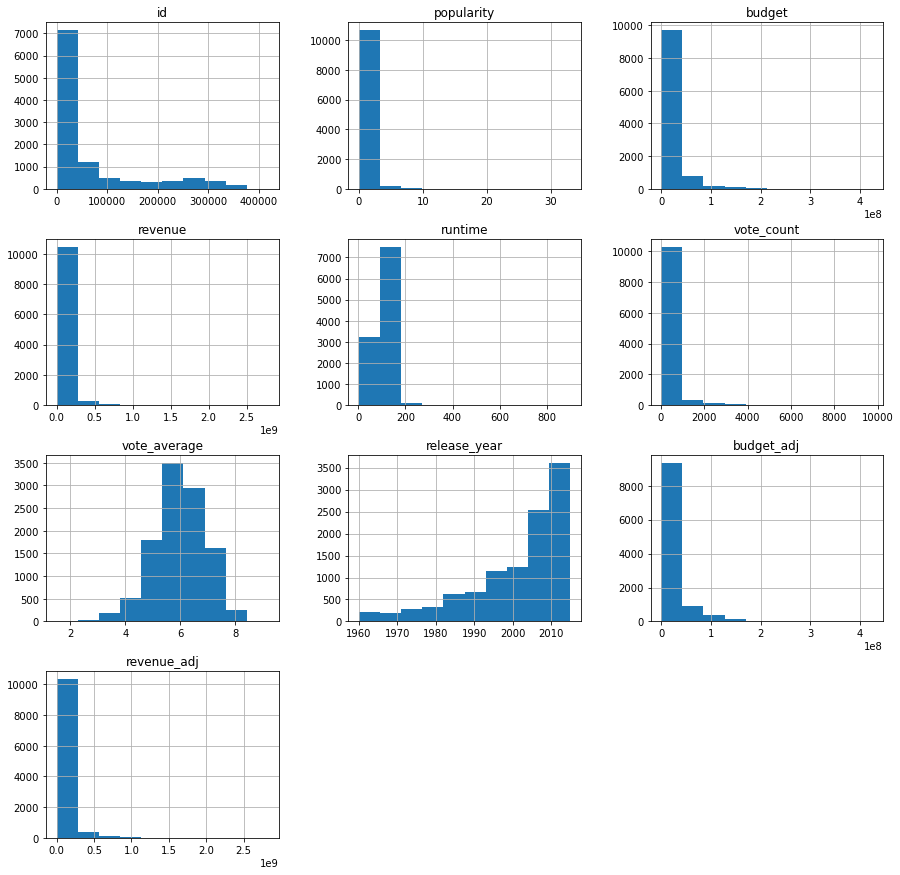

In [19]:
#calling the pandas `hist`() method returns histograms for all columns in the series.
df.hist(figsize=(15,15));

### what's the Runtime of the movies?

In [21]:
#defining a function to find the mean of a column
df['runtime'].mean()

102.36385453202878

In [22]:
#desriptive statistics for runtime column
df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

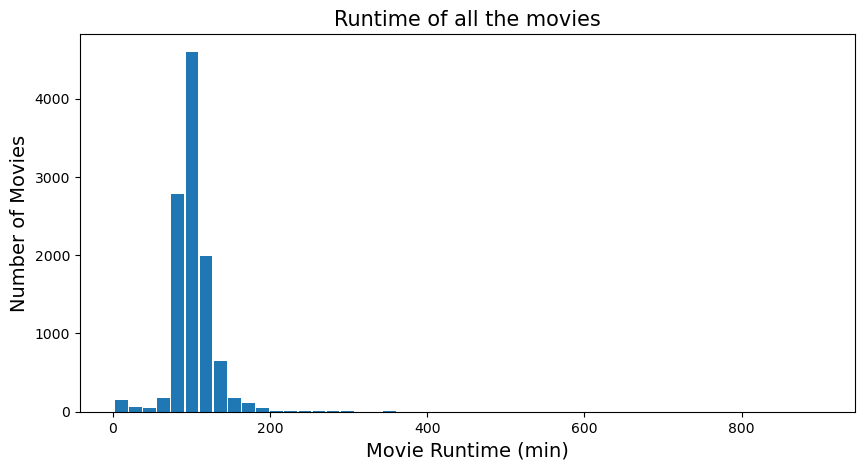

In [30]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Movie Runtime (min)', fontsize = 14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(df['runtime'], rwidth = 0.9, bins =50)
#displays the plot
plt.show()

**Observation**
* The mean runtime for a movie in the dataset is 102 minutes.
* 20% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes.

### What's the relationship between movie budget and revenue?

In [31]:
budgets = df.groupby('release_year').mean()['budget_adj']
revenues = df.groupby('release_year').mean()['revenue_adj']

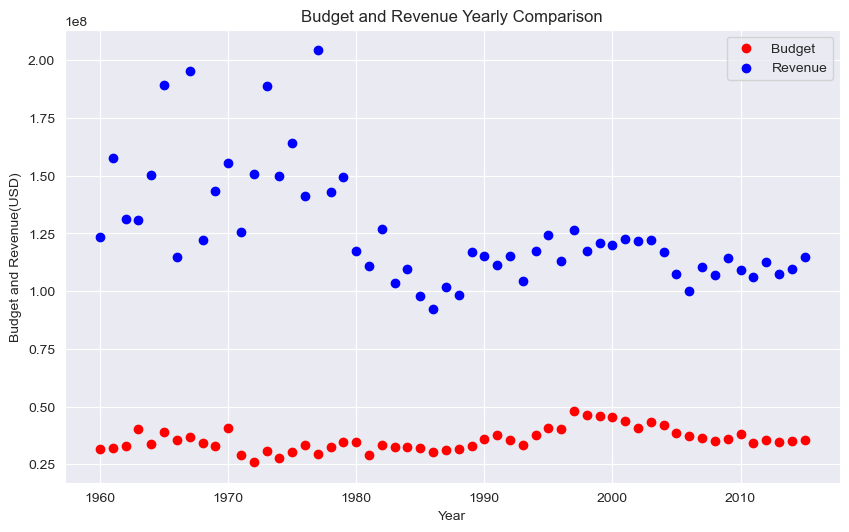

In [32]:
# line graph
sns.set_style('darkgrid')
x1 = budgets.index
y1 = budgets
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(10,6), dpi = 100)
plt.scatter(x1, y1, color='red', label = 'Budget')
plt.scatter(x2, y2, color='blue', label = 'Revenue')
plt.title('Budget and Revenue Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue(USD)')
plt.legend(loc = 'upper right')
plt.show();

**Observation**
there is a positive correlation between movie budget and revenue

### What is the most profitable movie?

In [35]:
df['Profit'] = df['revenue_adj'] - df['budget_adj']

df.head(5)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [37]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie with Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie With Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie with Highest Profit :  Star Wars
Movie With Lowest Profit  :  The Warrior's Way


,1329,2244
id,11,46528
popularity,12.0379,0.25054
budget,1.1e+07,4.25e+08
revenue,7.75398e+08,1.10876e+07
original_title,Star Wars,The Warrior's Way
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.9,6.4


**Observation** - Starwars is the most profitable movie from the dataset

**What are the number of movie released each year?**

In [39]:
#grouping number of movies by year
movie_released= df.groupby('release_year').count()['id']
movie_released.head(10)


release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

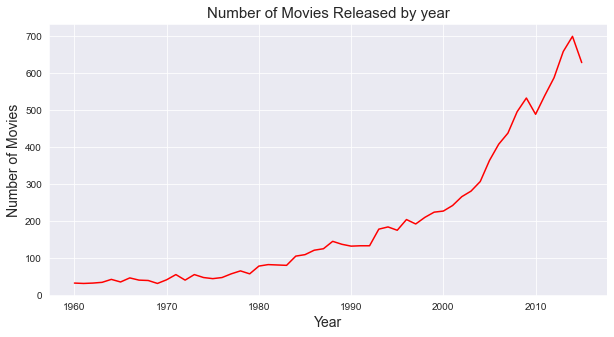

In [40]:
# visualization

#set the sheet style
sns.set_style('darkgrid')
x = movie_released.index
y = movie_released
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Number of Movies Released by year', fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

**Observation**
* about 30 to 100 movies was released each year between 1960 and 1980.
* By year 2000, it went up to 200 movies per year then a sharp increase to 700 movies 15 years later.


<a id='conclusions'></a>
## Conclusions

* The mean runtime for a movie in the dataset is 102 minutes. There is a move that runs 900 minutes, that is too long. 20% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes.

* Budget and Revenue have a postively correlated relationship.The revenue has remained higher than the budget throughout the year
* Star Wars is the most proftable movie in the dataset and warrior's way has the lowest profitabilty

* there is a significant increase from the number of movies released each year from 1960 to 2015. 

## Limitations

*  I decided to keep all the xero values from the data set because there were too many. That number was too much to drop from the dataset.They were replaced with mean values.

* It is not exactly known how vote_average and vote_count are calculated so we best use those values to anayse data fully.

* Units in Budget and Revenue column is undefined, it might be possible different movies different currency according to the country they are produce in.


# **Citations**<a class="anchor" id="citations"></a>


https://github.com/emilylauyw/Udacity_DAND_Project3-Investigate_TMDb_Movie_Dataset/blob/master/investigate-tmdb-dataset.ipynb
https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset
https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe